# Initialize

In [52]:
#initialize

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
#Load Data


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data


In [54]:
dfFootball = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/football/football.csv')


In [55]:
dfFootball.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [56]:
dfFootball.describe(include='all')


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


# Fit a Regression Model to Predict the Current Value of a player

In [57]:
# Assign dependent(Y) and independent(X) variables
X = dfFootball.loc[:,['age','minutes played','award']]
Y = dfFootball.loc[:,['current_value']]

In [58]:
# Fit linear regression model - aka train model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [59]:
# Display regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [8974117.08073394]
Coefficients: 
 [[-428398.90612121    1775.86785454  722873.91229155]]


In [60]:
# Generate new prediction - aka run scoring model
New_Award = 1
New_Minutes_Played = 4324
New_Age = 30
print ('Predicted Market Value: \n', regr.predict([[New_Age, New_Minutes_Played, New_Award]]))

Predicted Market Value: 
 [[4523876.41241345]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# EDA in Python

**Histogram of current values where the bins cover 1000000 increments**

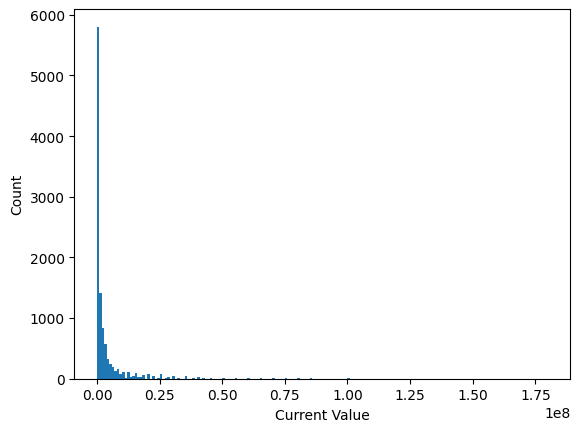

In [61]:
# Set data fields
y = dfFootball.loc[:,'current_value']

# Set histogram parameters
binwidth = 1000000
binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot

plt.hist(y, bins=binrange)
plt.xlabel('Current Value')
plt.ylabel('Count')
plt.show()

As seen in the histogram, current values are primarily concentrated between 0 and 1 million. The number of players with values above 1 million is very low

**Histogram of current values where the bins cover 100000 increments**

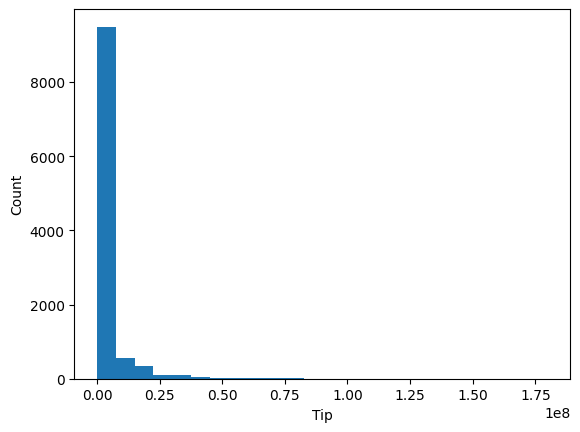

In [62]:
# Set data fields
y = dfFootball.loc[:,'current_value']

# Set histogram parameters
binwidth = 7500000
binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('Tip')
plt.ylabel('Count')
plt.show()



**Scatterplot of minutes played vs. value of the player**




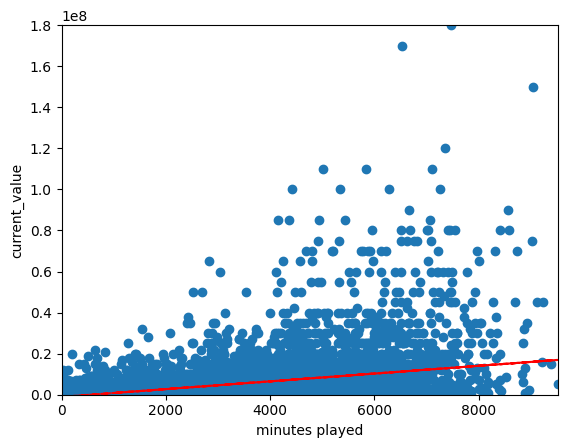

In [63]:
# Set data fields
x = dfFootball.loc[:,'minutes played']
y = dfFootball.loc[:,'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(dfFootball.loc[:,'minutes played']))
plt.ylim(0,np.max(dfFootball.loc[:,'current_value']))
plt.xlabel('minutes played')
plt.ylabel('current_value')
plt.show()

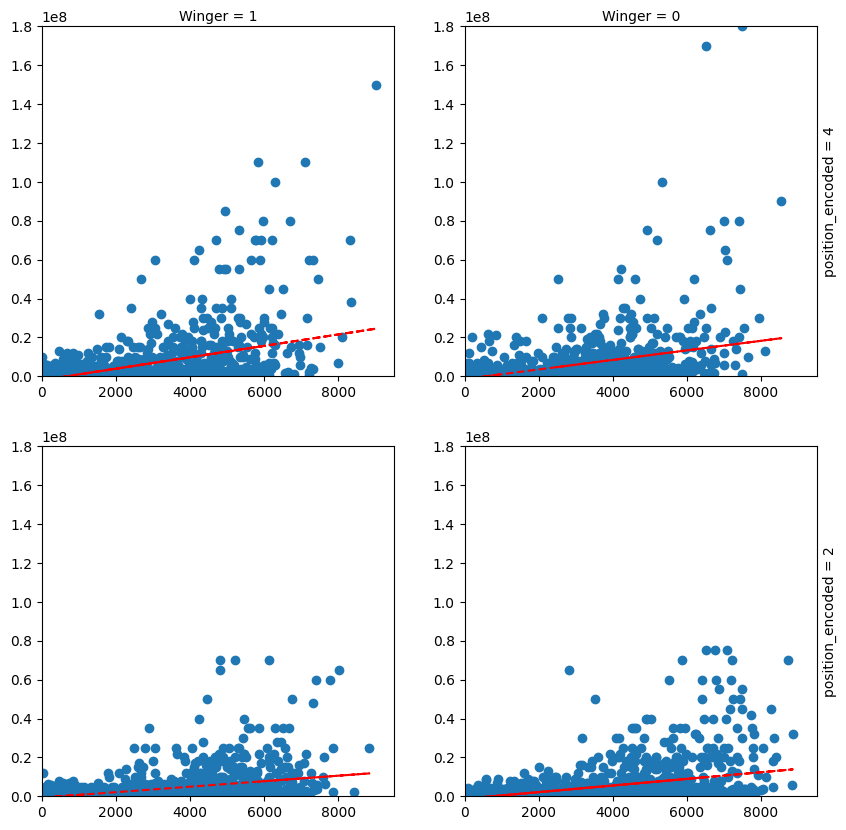

In [64]:
### Matrix of plots
fig, axs = plt.subplots(2, 2, figsize=(10,10))

## Top left plot
x = dfFootball.loc[(dfFootball['winger']== 1 ) & (dfFootball['position_encoded'] == 4),'minutes played']
y = dfFootball.loc[(dfFootball['winger']== 1 ) & (dfFootball['position_encoded'] == 4),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 0].scatter(x,y)
axs[0, 0].plot(x,p(x),"r--")
axs[0, 0].set_xlim(0,np.max(dfFootball.loc[:,'minutes played']))
axs[0, 0].set_ylim(0,np.max(dfFootball.loc[:,'current_value']))
axs[0, 0].xaxis.set_label_position("top")
axs[0, 0].yaxis.set_label_position("left")
axs[0, 0].set_xlabel('Winger = 1')


## Top right plot
x = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 4),'minutes played']
y = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 4),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 1].scatter(x,y)
axs[0, 1].plot(x,p(x),"r--")
axs[0, 1].set_xlim(0,np.max(dfFootball.loc[:,'minutes played']))
axs[0, 1].set_ylim(0,np.max(dfFootball.loc[:,'current_value']))
axs[0, 1].set_xlabel('Winger = 0')
axs[0, 1].xaxis.set_label_position("top")
axs[0, 1].set_ylabel('position_encoded = 4')
axs[0, 1].yaxis.set_label_position("right")

## Bottom left plot
x = dfFootball.loc[(dfFootball['winger']== 1) & (dfFootball['position_encoded'] == 2),'minutes played']
y = dfFootball.loc[(dfFootball['winger']== 1) & (dfFootball['position_encoded'] == 2),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 0].scatter(x,y)
axs[1, 0].plot(x,p(x),"r--")
axs[1, 0].set_xlim(0,np.max(dfFootball.loc[:,'minutes played']))
axs[1, 0].set_ylim(0,np.max(dfFootball.loc[:,'current_value']))

## Bottom right plot
x = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 2),'minutes played']
y = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 2),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 1].scatter(x,y)
axs[1, 1].plot(x,p(x),"r--")
axs[1, 1].set_xlim(0,np.max(dfFootball.loc[:,'minutes played']))
axs[1, 1].set_ylim(0,np.max(dfFootball.loc[:,'current_value']))
axs[1, 1].set_ylabel('position_encoded = 2')
axs[1, 1].yaxis.set_label_position("right")

Scatterplot of Current Value vs. Minutes played separated by player position in terms of the numbers 2(if winger is 1 player is a winger-back, if 0 player is center-back) and 4(if winger is 1 player is a winger-attacker, if 0 player is center-forward) and whether he is winger or not(1 and 0). Deep dive into specific postions like center back, winger backs, attack wingers and center forwards we end up observing how their current value changes for these specific positions while they keep playing longer minutes. Attacker winger value increase more compared to Forwards while they play longer minutes, and similarly center-backs gain more market value compared to winger-backs while players minutes played increases. I guess people and teams value "tecrübeli stoper" > "tecrübeli bek oyuncusu"

# **Top Left Plot: Winger = 1 and position_encoded = 4 (Winger-Attacker)**

# **Top Right Plot: Winger = 0 and position_encoded = 4 (Center-Forward)**

# **Bottom Left Plot: Winger = 1 and position_encoded = 2 (Winger-Back)**

# **Bottom Right Plot: Winger = 0 and position_encoded = 2 (Center-Back)**



# Takeaways

* Increased Variability in Attackers: The market value of attackers, wingers and non-wingers alike, varies more and has a discernible positive relationship with playing time. This implies that playing time and steady performance greatly increase offensive players' market value.

* Reduced Value for Defenders: Whether or not they are wingers, defense players typically have more stable and lower market valuations. Playing time has less of an impact on their market value, suggesting that other elements like awards, card information, and highest value as a whole may be more important in determining their worth.

* The role of winger status is to increase market value variability, particularly for attacking positions. Attacking wingers have a better chance of reaching greater market values than non-winger players

# **For other experiments, I have looked at the affect of height, awards, goals and assists(in total) of these players in specified positions**

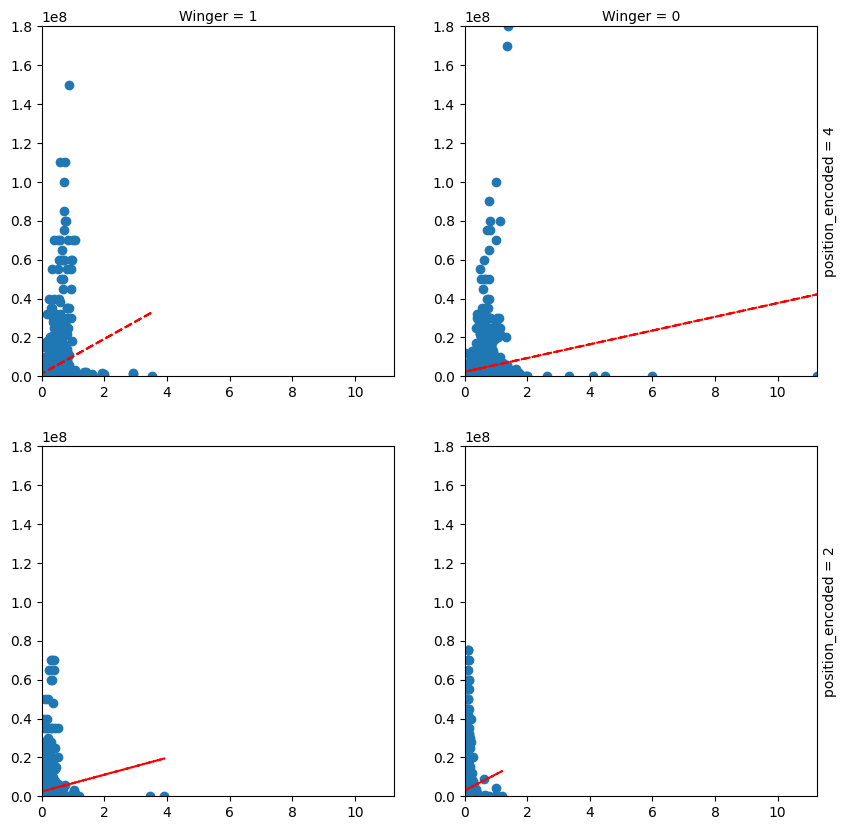

In [65]:
### Matrix of plots
fig, axs = plt.subplots(2, 2, figsize=(10,10))

dfFootball['total_goals_assists'] = dfFootball['goals'] + dfFootball['assists']

## Top left plot
x = dfFootball.loc[(dfFootball['winger']== 1 ) & (dfFootball['position_encoded'] == 4),'total_goals_assists']
y = dfFootball.loc[(dfFootball['winger']== 1 ) & (dfFootball['position_encoded'] == 4),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 0].scatter(x,y)
axs[0, 0].plot(x,p(x),"r--")
axs[0, 0].set_xlim(0,np.max(dfFootball.loc[:,'total_goals_assists']))
axs[0, 0].set_ylim(0,np.max(dfFootball.loc[:,'current_value']))
axs[0, 0].xaxis.set_label_position("top")
axs[0, 0].yaxis.set_label_position("left")
axs[0, 0].set_xlabel('Winger = 1')


## Top right plot
x = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 4),'total_goals_assists']
y = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 4),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 1].scatter(x,y)
axs[0, 1].plot(x,p(x),"r--")
axs[0, 1].set_xlim(0,np.max(dfFootball.loc[:,'total_goals_assists']))
axs[0, 1].set_ylim(0,np.max(dfFootball.loc[:,'current_value']))
axs[0, 1].set_xlabel('Winger = 0')
axs[0, 1].xaxis.set_label_position("top")
axs[0, 1].set_ylabel('position_encoded = 4')
axs[0, 1].yaxis.set_label_position("right")

## Bottom left plot
x = dfFootball.loc[(dfFootball['winger']== 1) & (dfFootball['position_encoded'] == 2),'total_goals_assists']
y = dfFootball.loc[(dfFootball['winger']== 1) & (dfFootball['position_encoded'] == 2),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 0].scatter(x,y)
axs[1, 0].plot(x,p(x),"r--")
axs[1, 0].set_xlim(0,np.max(dfFootball.loc[:,'total_goals_assists']))
axs[1, 0].set_ylim(0,np.max(dfFootball.loc[:,'current_value']))

## Bottom right plot
x = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 2),'total_goals_assists']
y = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 2),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 1].scatter(x,y)
axs[1, 1].plot(x,p(x),"r--")
axs[1, 1].set_xlim(0,np.max(dfFootball.loc[:,'total_goals_assists']))
axs[1, 1].set_ylim(0,np.max(dfFootball.loc[:,'current_value']))
axs[1, 1].set_ylabel('position_encoded = 2')
axs[1, 1].yaxis.set_label_position("right")

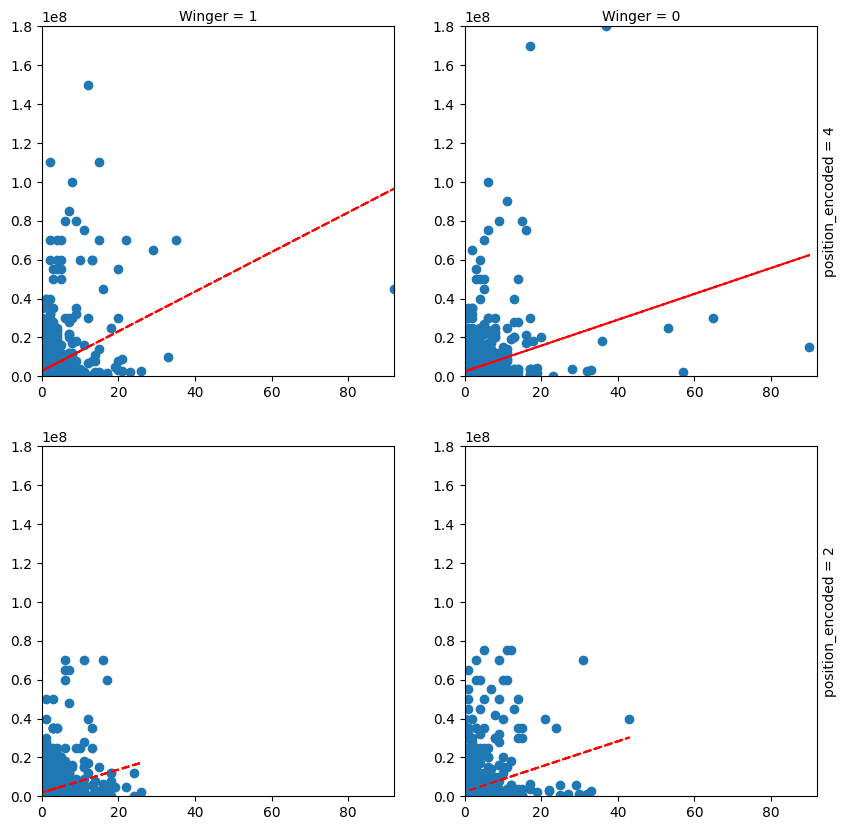

In [66]:
### Matrix of plots
fig, axs = plt.subplots(2, 2, figsize=(10,10))

## Top left plot
x = dfFootball.loc[(dfFootball['winger']== 1 ) & (dfFootball['position_encoded'] == 4),'award']
y = dfFootball.loc[(dfFootball['winger']== 1 ) & (dfFootball['position_encoded'] == 4),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 0].scatter(x,y)
axs[0, 0].plot(x,p(x),"r--")
axs[0, 0].set_xlim(0,np.max(dfFootball.loc[:,'award']))
axs[0, 0].set_ylim(0,np.max(dfFootball.loc[:,'current_value']))
axs[0, 0].xaxis.set_label_position("top")
axs[0, 0].yaxis.set_label_position("left")
axs[0, 0].set_xlabel('Winger = 1')


## Top right plot
x = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 4),'award']
y = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 4),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 1].scatter(x,y)
axs[0, 1].plot(x,p(x),"r--")
axs[0, 1].set_xlim(0,np.max(dfFootball.loc[:,'award']))
axs[0, 1].set_ylim(0,np.max(dfFootball.loc[:,'current_value']))
axs[0, 1].set_xlabel('Winger = 0')
axs[0, 1].xaxis.set_label_position("top")
axs[0, 1].set_ylabel('position_encoded = 4')
axs[0, 1].yaxis.set_label_position("right")

## Bottom left plot
x = dfFootball.loc[(dfFootball['winger']== 1) & (dfFootball['position_encoded'] == 2),'award']
y = dfFootball.loc[(dfFootball['winger']== 1) & (dfFootball['position_encoded'] == 2),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 0].scatter(x,y)
axs[1, 0].plot(x,p(x),"r--")
axs[1, 0].set_xlim(0,np.max(dfFootball.loc[:,'award']))
axs[1, 0].set_ylim(0,np.max(dfFootball.loc[:,'current_value']))

## Bottom right plot
x = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 2),'award']
y = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 2),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 1].scatter(x,y)
axs[1, 1].plot(x,p(x),"r--")
axs[1, 1].set_xlim(0,np.max(dfFootball.loc[:,'award']))
axs[1, 1].set_ylim(0,np.max(dfFootball.loc[:,'current_value']))
axs[1, 1].set_ylabel('position_encoded = 2')
axs[1, 1].yaxis.set_label_position("right")

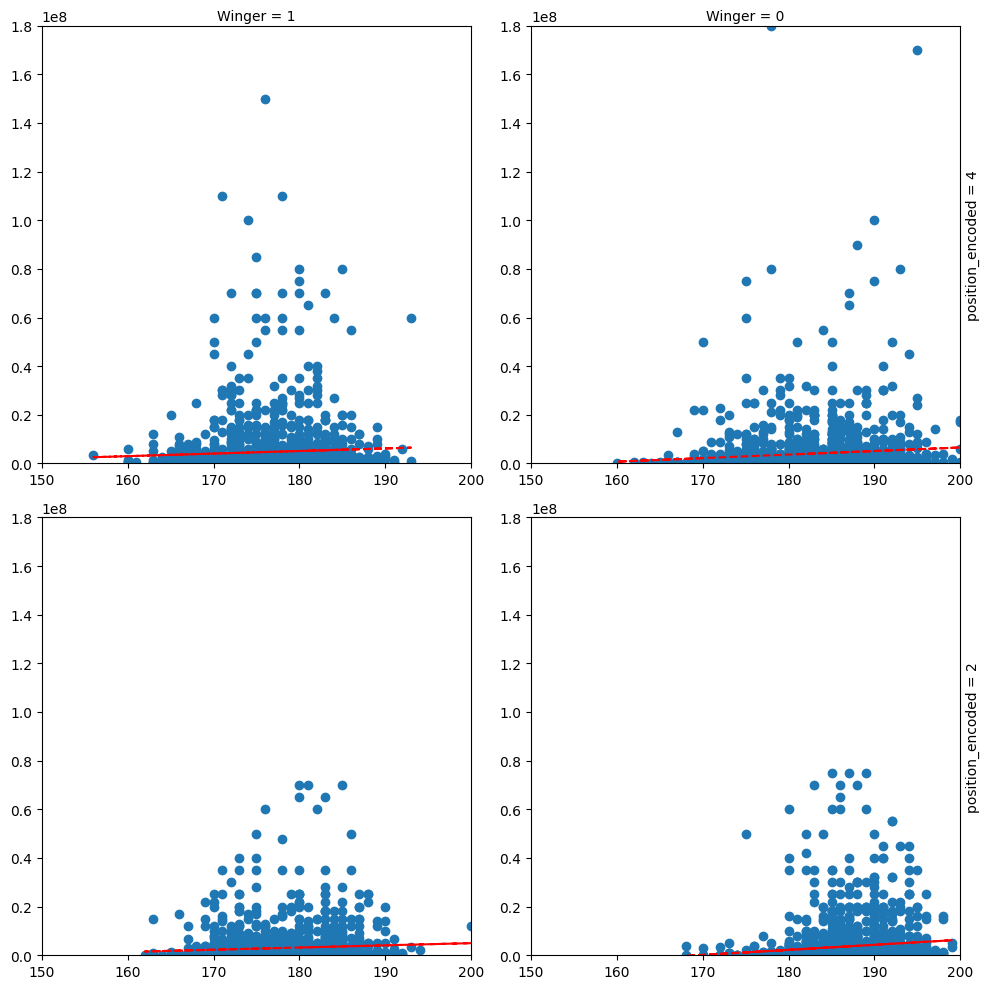

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming dfFootball is already loaded
# Set the desired height range
min_height = 150
max_height = 200

### Matrix of plots
fig, axs = plt.subplots(2, 2, figsize=(10,10))

## Top left plot
x = dfFootball.loc[(dfFootball['winger']== 1 ) & (dfFootball['position_encoded'] == 4) &
                   (dfFootball['height'] >= min_height) & (dfFootball['height'] <= max_height), 'height']
y = dfFootball.loc[(dfFootball['winger']== 1 ) & (dfFootball['position_encoded'] == 4) &
                   (dfFootball['height'] >= min_height) & (dfFootball['height'] <= max_height), 'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 0].scatter(x, y)
axs[0, 0].plot(x, p(x), "r--")
axs[0, 0].set_xlim(min_height, max_height)
axs[0, 0].set_ylim(0, np.max(dfFootball['current_value']))
axs[0, 0].xaxis.set_label_position("top")
axs[0, 0].yaxis.set_label_position("left")
axs[0, 0].set_xlabel('Winger = 1')

## Top right plot
x = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 4) &
                   (dfFootball['height'] >= min_height) & (dfFootball['height'] <= max_height), 'height']
y = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 4) &
                   (dfFootball['height'] >= min_height) & (dfFootball['height'] <= max_height), 'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 1].scatter(x, y)
axs[0, 1].plot(x, p(x), "r--")
axs[0, 1].set_xlim(min_height, max_height)
axs[0, 1].set_ylim(0, np.max(dfFootball['current_value']))
axs[0, 1].set_xlabel('Winger = 0')
axs[0, 1].xaxis.set_label_position("top")
axs[0, 1].set_ylabel('position_encoded = 4')
axs[0, 1].yaxis.set_label_position("right")

## Bottom left plot
x = dfFootball.loc[(dfFootball['winger']== 1) & (dfFootball['position_encoded'] == 2) &
                   (dfFootball['height'] >= min_height) & (dfFootball['height'] <= max_height), 'height']
y = dfFootball.loc[(dfFootball['winger']== 1) & (dfFootball['position_encoded'] == 2) &
                   (dfFootball['height'] >= min_height) & (dfFootball['height'] <= max_height), 'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 0].scatter(x, y)
axs[1, 0].plot(x, p(x), "r--")
axs[1, 0].set_xlim(min_height, max_height)
axs[1, 0].set_ylim(0, np.max(dfFootball['current_value']))

## Bottom right plot
x = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 2) &
                   (dfFootball['height'] >= min_height) & (dfFootball['height'] <= max_height), 'height']
y = dfFootball.loc[(dfFootball['winger']== 0) & (dfFootball['position_encoded'] == 2) &
                   (dfFootball['height'] >= min_height) & (dfFootball['height'] <= max_height), 'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 1].scatter(x, y)
axs[1, 1].plot(x, p(x), "r--")
axs[1, 1].set_xlim(min_height, max_height)
axs[1, 1].set_ylim(0, np.max(dfFootball['current_value']))
axs[1, 1].set_ylabel('position_encoded = 2')
axs[1, 1].yaxis.set_label_position("right")

plt.tight_layout()
plt.show()
